   # **BIOMECÁNICA DE PACIENTES ORTOPÉDICOS**
## Cristian F. Zapata y Belky Alejandra

![](https://cdn.gallerix.asia/x/src/news/2012/da-vinci-anatomy-drawing.jpg)

## Importamos librerías importantes

In [1]:
def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)


toggle_cell_code('col')
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




Codigo

## Importamos el dataset

In [2]:
toggle_cell_code('codigo')
#df3=pd.read_csv("/home/cristian/Descargas/huesos y esas vainas/column_3C_weka.csv")
#df3=pd.read_csv('/home/cristian/Descargas/huesos y esas vainas/column_3C_weka.csv')
df3=pd.read_csv('C:/Users/belky/column_3C_weka.csv')

Codigo

## Este es el head del dataset

In [3]:
toggle_cell_code('codigo1')
df3.head()

Codigo

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## Información de la base de datos

In [4]:
toggle_cell_code('codigo2')
df3.info()
df=df3.copy()

Codigo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### ¿Qué son esas características?

El nombre de las columnas que tenemos son:

0. Incidencia Pélvica (IP)
1. Inclinación Pélvica (AP)
2. Ángulo Lordosis Lumbar (ALL)
3. Pendiente Sacra (PS)
4. Radio Pélvico (RP)
5. Grado de Espondilolistesis (GE)
6. Clase

# Teoría de las características



## 1. Incidencia Pélvica (PI)
Es una medida del ángulo que hay entre una línea que atraviesa los extremos del       sacro y la línea desde el punto superior del sacro, hasta el centro de la cabeza femoral (la bola del hueso del músculo). 

Es decir, es un término que relaciona la orientación y la posición de la pelvis con la columna.


![](https://eor.bioscientifica.com/view/journals/eor/6/12/2058-5241.6.210062-fig5.jpeg)





## 2. Inclinación Pélvica (PT)

Se refiere a la curvatura de la columna vertebral y la orientación de la pelvis en una posición de pie. La inclinación pélvica se puede dividir en dos tipos: la inclinación anterior y la inclinación posterior.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgPbYsjZy6GUyVKsDZzjlnhoyJblEJUOOKeJuck8Kuy6mhJQVP)

![](https://i.redd.it/dr0hlahc3xj41.jpg)


## 3. Pendiente Sacra (SS)

Es la resta entre la incidencia pélvica y la inclinación pélvica. Y me dice cuál es la   inclinación del hueso sacro. Esta inclinación puede tener efectos significativos en la postura y la mecánica del cuerpo.

### SS≈40

![](https://www.medigraphic.com/files/abc/bc-2022/4/bc224h-1.jpg)

## 4. Ángulo Lordosis Lumbar (LL)

El ángulo de lordosis lumbar es una medida utilizada en medicina para evaluar la curvatura de la columna vertebral en la zona lumbar. La lordosis lumbar se refiere a la curvatura natural de la columna vertebral en la región lumbar, que es la zona baja de la espalda, en la que la columna se curva hacia adentro, en dirección al abdomen.

El ángulo normal de lordosis lumbar en adultos suele oscilar entre 30 y 60 grados.
Una lordosis lumbar excesiva puede ser el resultado de una mala postura, un trauma, un desequilibrio muscular, una obesidad, una enfermedad degenerativa del disco, una escoliosis o una displasia de cadera.

![](https://scontent.fczu1-1.fna.fbcdn.net/v/t31.18172-8/19679172_788605147968765_6675043095018882452_o.jpg?_nc_cat=111&ccb=1-7&_nc_sid=9267fe&_nc_ohc=yMAbYnjDF6gAX_Er3Qe&_nc_ht=scontent.fczu1-1.fna&oh=00_AfCU8hpctDRlreEX3A2zNDSaODfhTko6MiUBkis5RothzQ&oe=6447E727)
![]()

## 5. Radio Pélvico (RP)

El radio pélvico es una medida utilizada en medicina para evaluar la forma y la estructura de la pelvis. Se refiere a la relación entre la distancia entre el promontorio sacro (la parte superior de la pelvis) y la sínfisis púbica (la parte inferior de la pelvis) y la distancia entre las dos espinas ilíacas anterosuperiores (las protuberancias óseas que se encuentran en la parte superior de los huesos de la cadera).
El radio pélvico se utiliza para determinar el grado de estrechez o amplitud de la pelvis, y es importante en el diagnóstico y tratamiento de trastornos de la pelvis, como la displasia de cadera o la artrosis.

![](https://enfermeria.top/talk/huesos-ligamentos-pelvis-perine/featured_hud4b1e0f1b49cee87dd56adb88728eecd_215008_720x0_resize_q90_lanczos.jpg)

## 6. Grado de Espondilolistesis (GE)

La espondilolistesis se refiere al deslizamiento de una vértebra sobre la vértebra adyacente. El grado de espondilolistesis se refiere al grado de deslizamiento de la vértebra.

El grado de espondilolistesis se clasifica en cuatro categorías, según la cantidad de deslizamiento de la vértebra:

* Grado 1: El deslizamiento es del 25% o menos.
* Grado 2: El deslizamiento es del 25% al 50%.
* Grado 3: El deslizamiento es del 50% al 75%.
* Grado 4: El deslizamiento es del 75% o más.

![](https://vidaabuelo.com/wp-content/uploads/2019/06/espondilolistesis-2.jpg)

## 7. Clases

# Espondilolistesis


![](https://doctorvalle.es/wp-content/uploads/2020/04/Espondilolistesis.jpg)       

# Hernia normal


![](https://herniaonline.com/wp-content/uploads/inguinal-hernia.jpg)

# Hernia de disco

![](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/11/22/17/38/mcdc7_herniated_disk-8col.jpg)

### Se cambia el nombre de las columnas por sus siglas

In [6]:
toggle_cell_code('codigo3')
df.rename(columns={'pelvic_incidence':'IP','pelvic_tilt':'AP','lumbar_lordosis_angle':'ALL','sacral_slope':'PS','pelvic_radius':'RP',
                      'degree_spondylolisthesis':'GE'},inplace=True)

Codigo

Quedando así...

In [7]:
df.head()

,IP,AP,ALL,PS,RP,GE,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## ¿Cómo se distribuyen los datos frente a '_clases_'?

Codigo

<AxesSubplot:ylabel='class'>

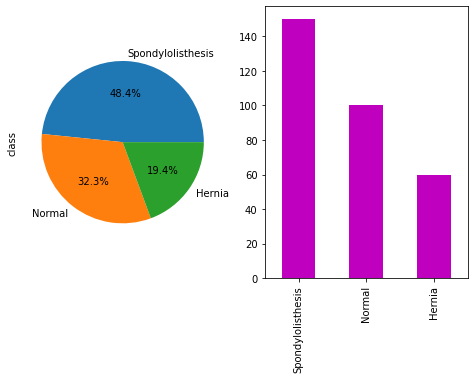

In [8]:
toggle_cell_code('codigo4')
graf, mallas=plt.subplots(nrows=1,ncols=2, figsize=(8,5))

df['class'].value_counts().plot(kind="bar",color='m',ax=mallas[1])
df['class'].value_counts().plot.pie(autopct="%1.1f%%",ax=mallas[0])

Como se ve, casi la mitad de los datos son de personas que tienen Espondilolistesis (más de 140). Y el 19% de los datos son de personas que tienen Hernias (60 personas) discales.

# ¿Cómo es la distribución de las demás variables?

Para estudiar las variables continuas, se les aplicó una estimación de densidad de kernel a los histogramas (KDE).

Codigo

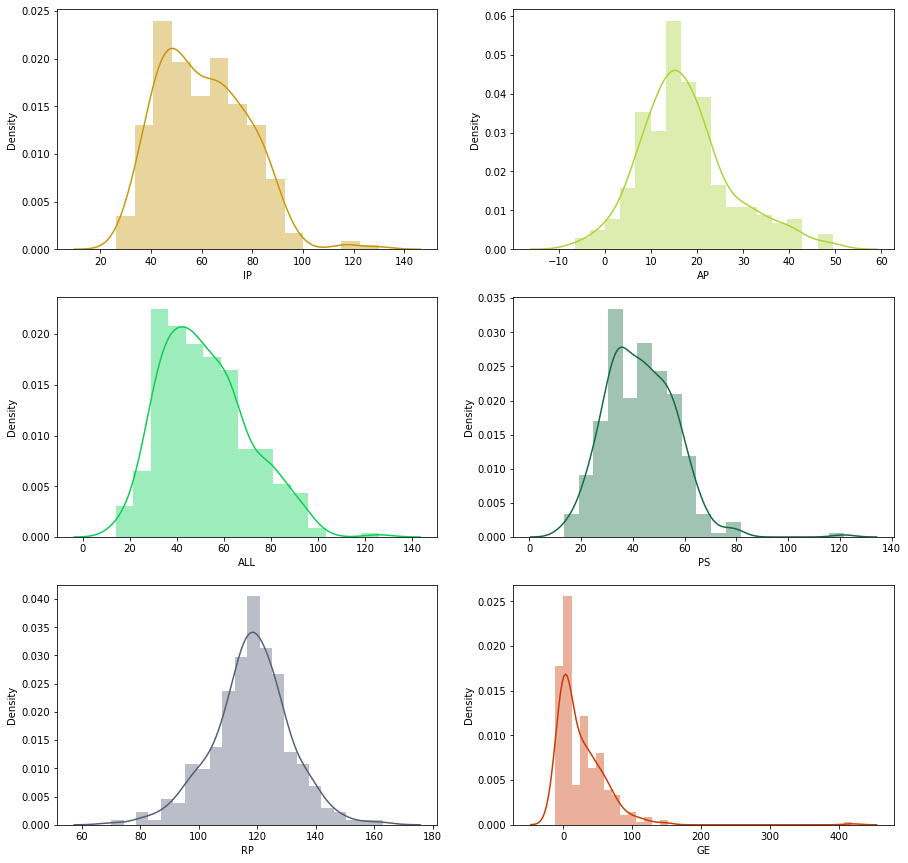

In [9]:
toggle_cell_code('codigo5')
import seaborn as sns
graf, malla=plt.subplots(nrows=3,ncols=2,figsize=(15,15)) 
malla=malla.flatten()
columnas=df.drop('class',axis=1).columns.values

for i, columnas in enumerate(columnas):
    color=['#C7980A', '#F4651F', '#82D8A7', '#CC3A05', '#575E76', '#156943', '#0BD055', '#ACD338']
    #print(columnas,i)
    sns.distplot(df[columnas],color=color[-i],ax=malla[i])


¿Qué se puede apreciar a partir de las gráficas de KDE?

1. La incidencia pélvica, el ángulo de Lordosis Lumbar y la Pendiente Sacra, son categorías que tienen una desviación estándar grande.
2. La inclinación pélvica y el radio pélvico si son valores con desviaciones estándar menores.
3. La gráfica de grado de espondilolistesis muestra que, la mayoría de personas tenían grado de espondilolistesis de grado 1 (menor a 25).

# ¿Cómo se distribuyen las categorías, según la variable '_class_'?

Codigo

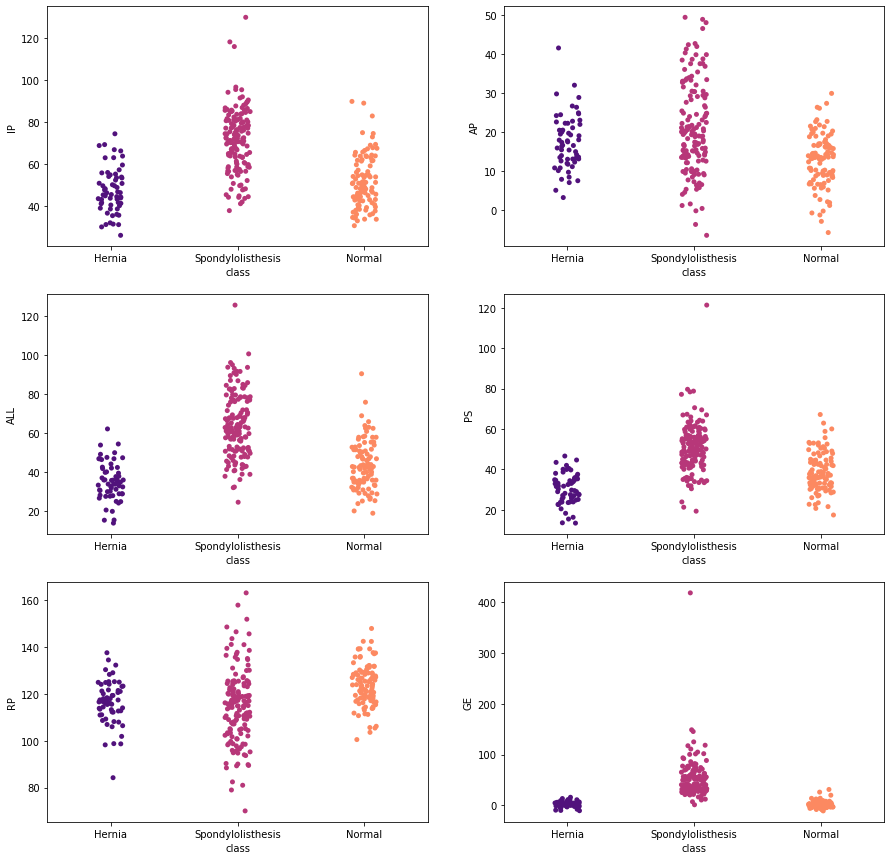

In [10]:
toggle_cell_code('codigo6')
graf, malla=plt.subplots(nrows=3,ncols=2,figsize=(15,15)) 
malla=malla.flatten()

columnas=df.drop('class',axis=1).columns.values

for i in range(len(columnas)):
    sns.stripplot(x = "class", y = columnas[i],ax=malla[i] ,data = df, palette="magma")

Este tipo de gráfico, permite ver los rangos según la cuál una persona puede tener una hernia, una espondilolistesis o ninguna.

Por ejemplo en el Ángulo de Lordosis Lumbar, si se mira la densidad de puntos, se podría decir que:
1. Una persona con una hernia, tiene un Ángulo de Lordosis Lumbar más abajo de 40.
2. Alguien normal, marca un ALL cerca a 40.
3. Alguien que marca un ALL en 60 tiene algún grado de espondilolistesis.

# Se muestran las estadísticas de los datos

In [11]:
toggle_cell_code('codigo7')
df.describe()

Codigo

,IP,AP,ALL,PS,RP,GE
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## ¿Cómo es el comportamiento de cada clase, con determinada característica?
### Diagramas de boxplot


Codigo

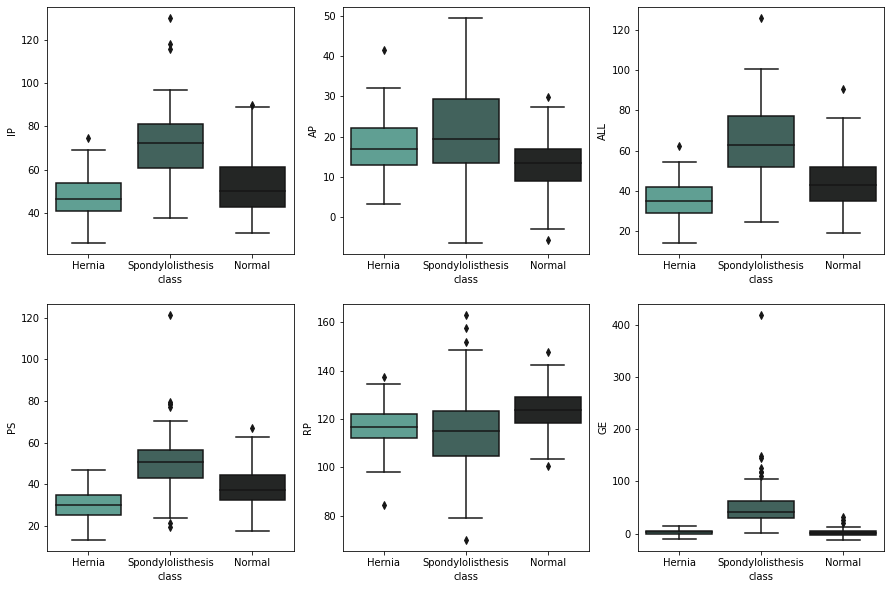

In [12]:
toggle_cell_code('codigo8')
graf, malla=plt.subplots(nrows=2,ncols=3,figsize=(15,10)) 
malla=malla.flatten()
columnas

for i in range (len(columnas)):
    sns.boxplot(x='class', y=columnas[i], ax=malla[i],data=df,palette='dark:#5A9_r')

# Tratamiento de Outliers

Como vemos, los datos se comportan relativamente bien. Ellos no tienen tanto sesgo. Pero la clase **Espondilolistesis** es quien tiene más outliers. 

**¿Cómo trataremos esos outlier's?**

Ya que ellos se comportan bien, y no tienen una cantidad significativa de outliers, lo que se hará será cambiar los que estén más alejados. Y se cambiaran por el promedio de los datos.

## Outliers para GE

Codigo

<AxesSubplot:xlabel='class', ylabel='GE'>

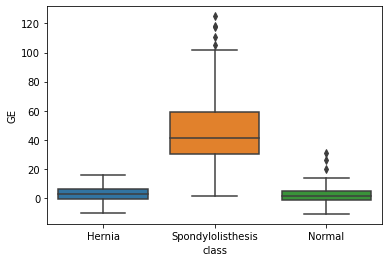

In [13]:
toggle_cell_code('codigo9')
for i in range (310):
    if df['GE'][i]>140:
        #print(df['GE'][i])
        df['GE'][i]=df['GE'].mean()
        #print(df['GE'][i])
sns.boxplot(x='class', y=df['GE'], data=df)

## Outliers para PS

Codigo

<AxesSubplot:xlabel='class', ylabel='PS'>

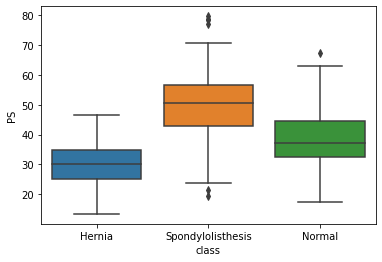

In [14]:
toggle_cell_code('codig')
for i in range (310):
    if df['PS'][i]>100:
        df['PS'][i]=df['PS'].mean()
        
sns.boxplot(x='class', y=df['PS'], data=df)

## Outliers para IP

Codigo

<AxesSubplot:xlabel='class', ylabel='IP'>

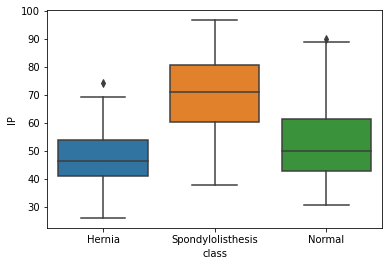

In [15]:
toggle_cell_code('codig1')
for i in range (310):
    if df['IP'][i]>100:
        df['IP'][i]=df['IP'].mean()
        
sns.boxplot(x='class', y=df['IP'], data=df)

## ¿Cómo quedaron los datos con el tratamiento de Outliers?

Codigo

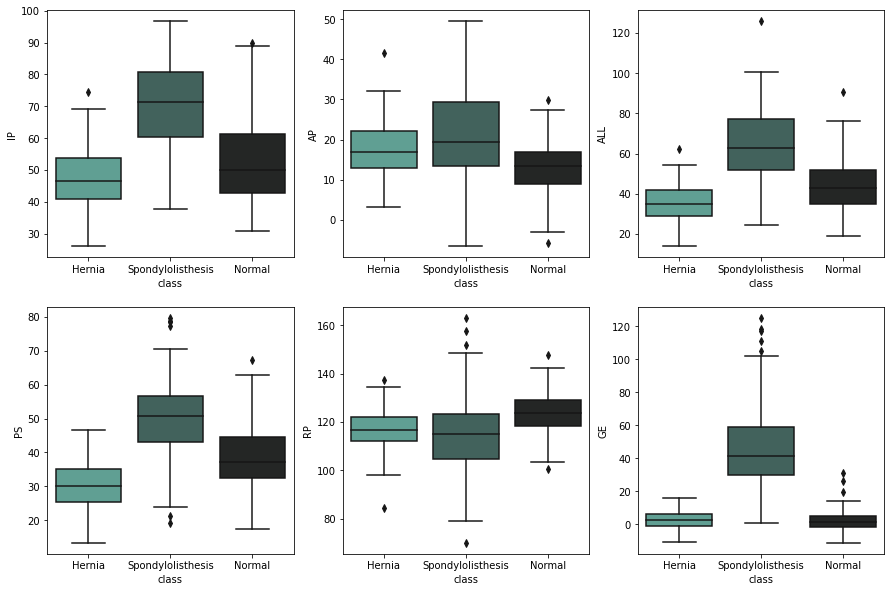

In [16]:
toggle_cell_code('codig2')
graf, malla=plt.subplots(nrows=2,ncols=3,figsize=(15,10)) 
malla=malla.flatten()
columnas

for i in range (len(columnas)):
    sns.boxplot(x='class', y=columnas[i], ax=malla[i],data=df,palette='dark:#5A9_r')

## Miremos la correlación entre las variables

Codigo

<AxesSubplot:>

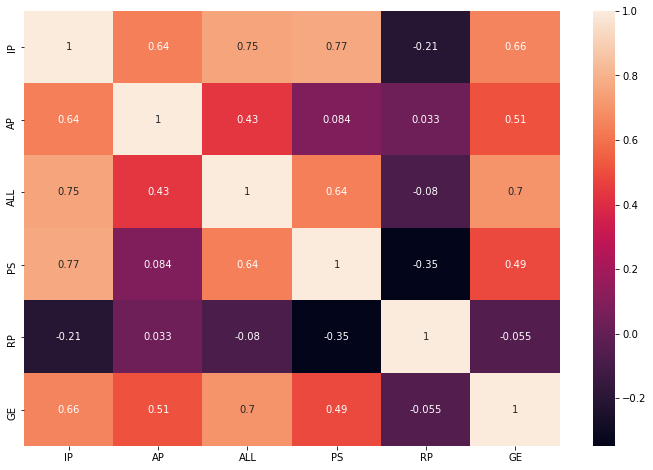

In [17]:
toggle_cell_code('codig3')
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Podemos codificar (con one-hot) la variable categórica, clase. Y ver cómo es la correlación de dicha variable con cada una de las afectaciones: la Hernia, el  Espondilolistesis.

In [18]:
toggle_cell_code('codig4')
d=df.copy()

Codigo

## Correlación con una codificación un one-hot, para las subclases de _class_

In [19]:
toggle_cell_code('codig5')
dummies = pd.get_dummies(d['class'], drop_first = False)
dummies.head(-10)

Codigo

,Hernia,Normal,Spondylolisthesis
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
295,0,1,0
296,0,1,0
297,0,1,0
298,0,1,0


In [20]:
toggle_cell_code('codig6')
# Añadimos las variables binarias al DataFrame
d = pd.concat([d, dummies], axis = 1)

# Eliminamos la vairable original
d = d.drop(columns=['class'])
d.info()

Codigo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IP                 310 non-null    float64
 1   AP                 310 non-null    float64
 2   ALL                310 non-null    float64
 3   PS                 310 non-null    float64
 4   RP                 310 non-null    float64
 5   GE                 310 non-null    float64
 6   Hernia             310 non-null    uint8  
 7   Normal             310 non-null    uint8  
 8   Spondylolisthesis  310 non-null    uint8  
dtypes: float64(6), uint8(3)
memory usage: 15.6 KB


Ahora sí podemos ver cómo es que se relacionan las variables con c/afectación:

Codigo

<AxesSubplot:>

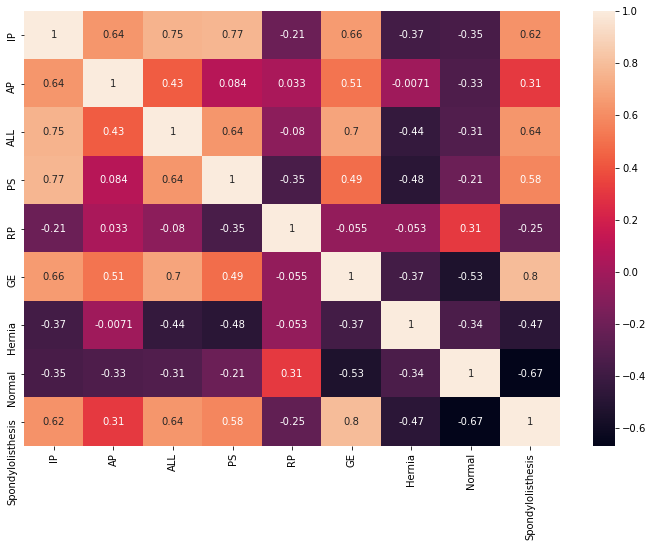

In [21]:
toggle_cell_code('codig7')
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(d.corr(),annot=True)

In [22]:
toggle_cell_code('codigv')
dfo=df.copy()

Codigo

# Métodos de Clasificación

In [23]:
toggle_cell_code('codig8')
df=pd.read_csv('C:/Users/belky/column_3C_weka.csv')
#df=pd.read_csv("/home/cristian/Descargas/huesos y esas vainas/column_3C_weka.csv")

Codigo

## Veamos las clases

In [24]:
toggle_cell_code('codi')
df["class"].info
pd.value_counts(df['class'])

Codigo

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

## Gráfico de dispersión: _Grado de Espondilolistesis vs Radio Pélvico_

Codigo

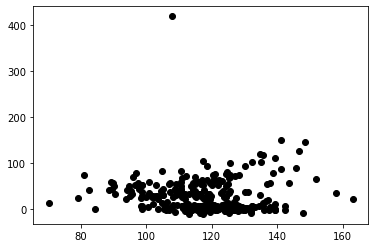

In [25]:
## Grafico de dispersion del grado de espondilolistesis vs radio pelvico
toggle_cell_code('codi1')
import matplotlib.pyplot as plt 

plt.scatter(x = df["pelvic_radius"],y = df["degree_spondylolisthesis"],color = "black")
x = df["pelvic_radius"]
y = df["degree_spondylolisthesis"]

## Grafico de las clases:

    Rojo: Normal
    Naranja: Hernia de disco
    Amarillo: Espondilolistesis


Codigo

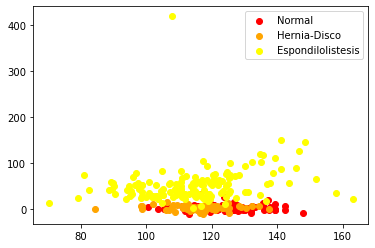

In [26]:
toggle_cell_code('codi3')
fig, ax=plt.subplots()
plt.scatter(x = df[df["class"] == "Normal"].pelvic_radius , y = df[df["class"] == "Normal"].degree_spondylolisthesis,color = "red", label='Normal')
plt.scatter(x = df[df["class"] == "Hernia"].pelvic_radius , y = df[df["class"] == "Hernia"].degree_spondylolisthesis,color = "orange",label='Hernia-Disco')
plt.scatter(x = df[df["class"] == "Spondylolisthesis"].pelvic_radius , y = df[df["class"] == "Spondylolisthesis"].degree_spondylolisthesis,color = "yellow", label='Espondilolistesis')
ax.legend()

## Se unen las clases: _Hernia normal y Hernia de disco_

In [27]:
toggle_cell_code('codi4')
df["class"]=df["class"].replace("Normal","Hernia")

Codigo

## Gráfico de referencia 
Clusters: Hernia y Espondilolistesis

Codigo

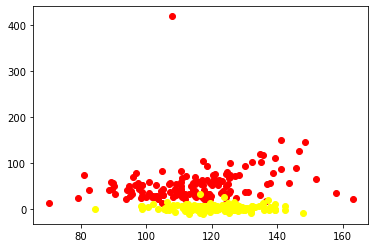

In [28]:
toggle_cell_code('codi6')
plt.scatter(x = df[df["class"] == "Spondylolisthesis"].pelvic_radius , y = df[df["class"] == "Spondylolisthesis"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df[df["class"] == "Hernia"].pelvic_radius , y = df[df["class"] == "Hernia"].degree_spondylolisthesis,color = "yellow")

## Balanceo 

Codigo

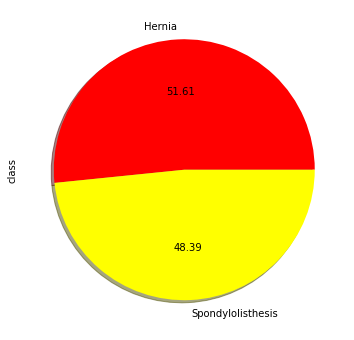

In [29]:
toggle_cell_code('codi7')
colors=('red','yellow')
df['class'].value_counts().plot(kind='pie',shadow=True,colors=colors,autopct='%.2f',figsize=(6,6))
plt.show()

Las clases no presentan un desvalanceo significante

# 1. MeanShift

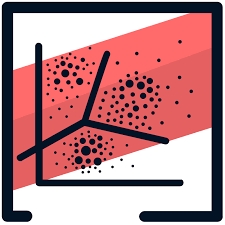

In [30]:
toggle_cell_code('codi0')

#Se hace una copia al dataset original
df1=df.copy()

#Importamos el métodola librería y el método
from sklearn.cluster import MeanShift, estimate_bandwidth

#Con los datos que están dentro 
#de la Gráfica de dispersion del G de espondilolistesis 
#vs radio pelvico, se crea un mini dataset
cluster_data_Aux = {"x":x,"y":y}
datac = pd.DataFrame(cluster_data_Aux)

#Se estima el tamaño idóneo del circulito
bandwidth = estimate_bandwidth(datac)

#este es el modelo
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)

#Se hace aplica el modelo al dataset pequeño, para entrenarlo
clusters = ms.fit_predict(datac)

#Se agregan esos clusters, como una columna 'label', al dataset original.
df1["label"] = clusters

Codigo

### Gráfico MeanShift

Codigo

Podemos ver como detecto 3 clusters (y un punto outlier).


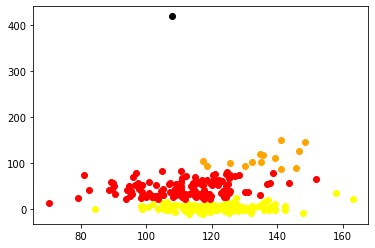

In [31]:
toggle_cell_code('cod3')
#fig, ax=plt.subplots()

#Se hace el mismo gráfico de G de espondilolitesis vs radio pélvico, con color diferente según el tipo de closter al
#que pertenece
plt.scatter(x = df1[df1.label == 0].pelvic_radius,y = df1[df1.label == 0].degree_spondylolisthesis , color = "yellow",label='Espondilolistesis')
plt.scatter(x = df1[df1.label == 1].pelvic_radius,y = df1[df1.label == 1].degree_spondylolisthesis , color = "red", label='Normal')
plt.scatter(x = df1[df1.label == 2].pelvic_radius,y = df1[df1.label == 2].degree_spondylolisthesis , color = "orange", label='Hernia')
plt.scatter(x = df1[df1.label == 3].pelvic_radius,y = df1[df1.label == 3].degree_spondylolisthesis , color = "black", label='Outlier')
#ax.legend()

print('Podemos ver como detecto 3 clusters (y un punto outlier).')

¿Cuántos elementos por clusters se obtuvieron?

In [32]:
toggle_cell_code('cod4')
pd.value_counts(df1['label'])

Codigo

0    167
1    128
2     14
3      1
Name: label, dtype: int64

¿Cómo podría mejorar?
Cambiando la función kernel, que en este caso, era Gaussiana.

# 2. DBSCAN

![](https://www.researchgate.net/publication/315326812/figure/fig2/AS:473095908663297@1489806262333/A-cluster-consists-of-core-points-red-and-border-points-green-Core-points-have-at.png)

In [33]:
toggle_cell_code('cod5')
df2=df.copy()

#Se estandariza los datos, es decir, se normalizan usando desviación estan
#dar.
datacc=datac.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

#Se improrta el método
from sklearn.cluster import DBSCAN

Codigo

### Los parámetros que se ligieron fueron

1. Radio: $\epsilon ps=0.5$
2. Mínimos vecinos: $minPts=4$

Estos parámetros se eligieron visualmente, es decir, se dejaron ellos, porque fueron los mejores candidatos.

In [34]:
toggle_cell_code('cod8')

#Se arma el modelo
cluster = DBSCAN(eps=0.5, min_samples=4)

#Se aplica el modelo sobre la mini-base de datos que se había creado (datac)
#solo que esta nueva (datacc) es el estandarizado de ella (datac).
cluster.fit(datacc)

#Esto de abajo se hizo para calibrar el haber encontrado 2 clusters
print(f'DBSCAN encontró {len(set(cluster.labels_) - set([-1]))} clusters y {(cluster.labels_ == -1).sum()} puntos de ruido.')

Codigo

DBSCAN encontró 2 clusters y 18 puntos de ruido.


Se hace el fit sobre la base de datos:

In [35]:
toggle_cell_code('cod9')

#Se hace el fit sobre la base de datos 
clusters = cluster.fit_predict(datacc)
df2["label"] = clusters

Codigo

¿Cuántos elementos hay en cada cluster?

El cluster '-1', son los outliers.

In [36]:
toggle_cell_code('co')
pd.value_counts(df2['label'])

Codigo

 0    285
-1     18
 1      7
Name: label, dtype: int64

## Gráfico de DBSCAN

Codigo

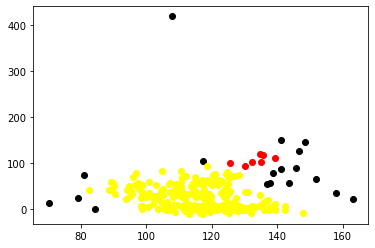

In [37]:
toggle_cell_code('co1')
plt.scatter(x = df2[df2.label == -1].pelvic_radius,y = df2[df2.label == -1].degree_spondylolisthesis , color = "black")
plt.scatter(x = df2[df2.label == 0].pelvic_radius,y = df2[df2.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df2[df2.label == 1].pelvic_radius,y = df2[df2.label == 1].degree_spondylolisthesis , color = "red")

¿Cómo podría mejorar?
1. Cambiando la métrica que calculara la similitud de los puntos, una Malahanobis, por ejemplo.
2. Normalización estándar, a una de rango.

Pero, la densidad de los clusters es variable, por eso DBSCAN, obtuvo malos resultados.

## 3. K-Means

In [38]:
toggle_cell_code('co3')
df3=df.copy()

Codigo

In [39]:
toggle_cell_code('co4')
from sklearn.cluster import KMeans

Codigo

In [40]:
toggle_cell_code('co6')
kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(datac)
df3["label"] = clusters

Codigo

## Accuracy

In [41]:
toggle_cell_code('co7')
dfn=df.copy()
dfn["class"] = [1 if each == "Hernia " else 0 for each in dfn["class"]]
df_class = dfn["class"]
predict_class = df3["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(df_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(df_class - predict_class)*100))

Codigo

accuracy is : 23.225806451612897


## Gráfico de K-means

Codigo

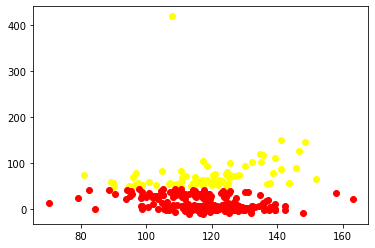

In [42]:
toggle_cell_code('co8')
plt.scatter(x = df3[df3.label == 0].pelvic_radius,y = df3[df3.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df3[df3.label == 1].pelvic_radius,y = df3[df3.label == 1].degree_spondylolisthesis , color = "red")

In [43]:
toggle_cell_code('co9')
pd.value_counts(df3['label'])

Codigo

1    238
0     72
Name: label, dtype: int64

# 4. Hierarchical Clustering
Método que arrojó los mejores resultados

In [65]:
toggle_cell_code('co_')
df4=df.copy()

Codigo

In [66]:
toggle_cell_code('co_1')
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

Codigo

linkage: El criterio de vinculación determina qué distancia usar entre conjuntos de observación.

ward: minimiza la varianza de los grupos que se fusionan

Codigo

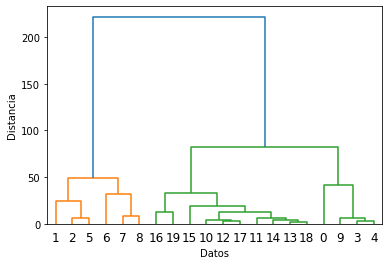

In [67]:
toggle_cell_code('co_2')
merg = linkage(datac.iloc[200:220,:],method="ward")
dendrogram(merg)
plt.xlabel("Datos")
plt.ylabel("Distancia")
plt.show()

Se hace fit

In [68]:
toggle_cell_code('co_3')
Hcluster = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = Hcluster.fit_predict(datac)

df4["label"] = cluster

Codigo

## Gráfico de clustering glomerativo

Ahora vamos a organizar el dataset para visualizar los cluster

Codigo

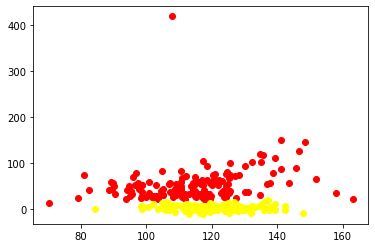

In [69]:
toggle_cell_code('co_4')
plt.scatter(x = df4[df4.label == 0].pelvic_radius,y = df4[df4.label == 0].degree_spondylolisthesis , color = "red")
plt.scatter(x = df4[df4.label == 1].pelvic_radius,y = df4[df4.label == 1].degree_spondylolisthesis , color = "yellow")

In [70]:
toggle_cell_code('co_5')
pd.value_counts(df4['label'])

Codigo

1    163
0    147
Name: label, dtype: int64

In [71]:
toggle_cell_code('co_6')
dfn=df.copy()
dfn["class"] = [0 if each == "Spondylolisthesis" else 1 for each in dfn["class"]]

Codigo

## Accuracy Hierarchical Clustering

In [72]:
toggle_cell_code('co_7')
df_class = dfn["class"]
predict_class = df4["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(df_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(df_class - predict_class)*100))

Codigo

accuracy is : 97.74193548387096


## Gráfico clustering aglomerativo con EDA

Codigo

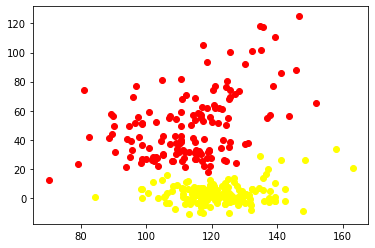

In [73]:
dfoo=dfo.copy()

x2 = dfoo["RP"]
y2 = dfoo["GE"]

cluster_data_Aux2 = {"x":x2,"y":y2}
datac2 = pd.DataFrame(cluster_data_Aux2)


toggle_cell_code('co_n')
Hcluster2 = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = Hcluster2.fit_predict(datac2)

dfoo["label"] = cluster


plt.scatter(x = dfoo[dfoo.label == 0].RP,y = dfoo[dfoo.label == 0].GE , color = "red")
plt.scatter(x = dfoo[dfoo.label == 1].RP,y = dfoo[dfoo.label == 1].GE , color = "yellow")




# Grafico comparativo 

Codigo

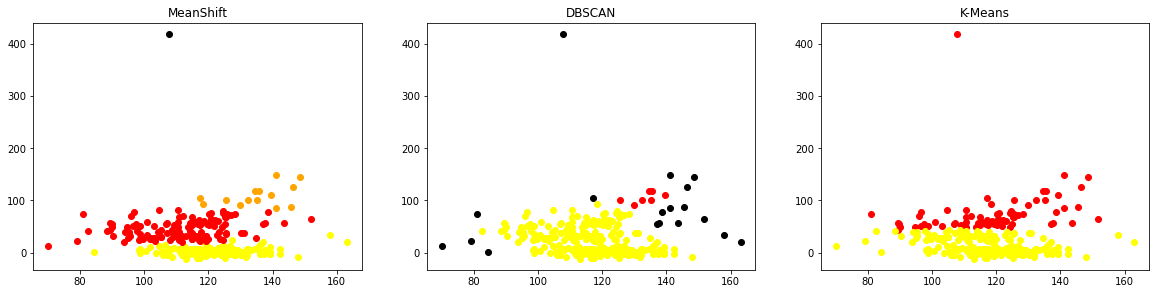

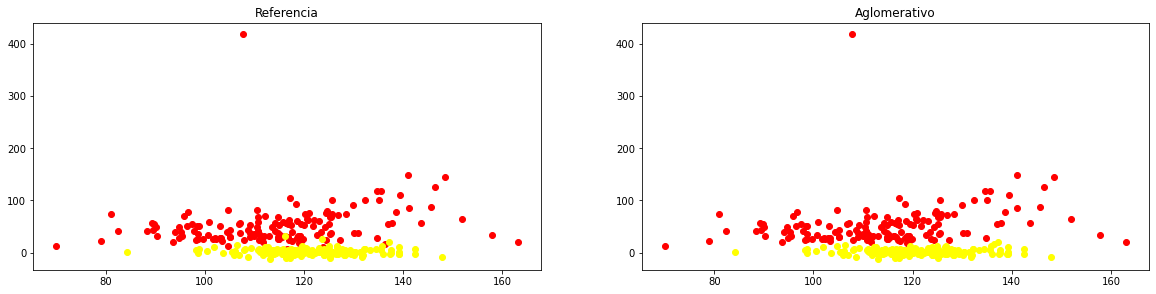

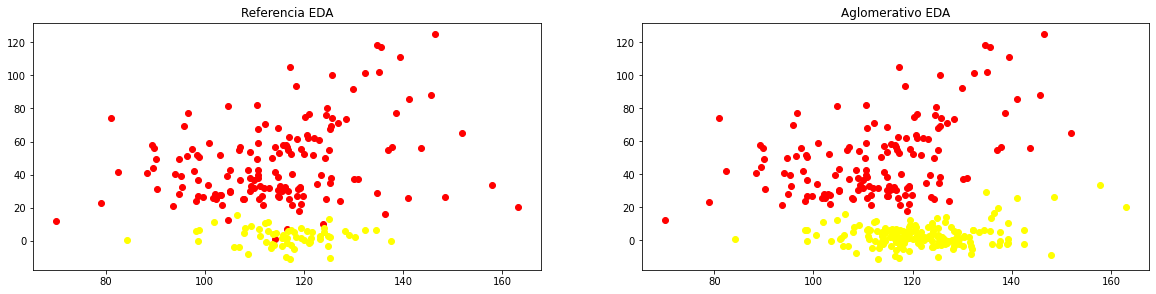

In [74]:
toggle_cell_code('co_8')
#We compare our model in graph
fig = plt.figure(figsize = (20,10))

plt.subplot(2, 3, 3)
plt.scatter(x = df3[df3.label == 0].pelvic_radius,y = df3[df3.label == 0].degree_spondylolisthesis , color = "red")
plt.scatter(x = df3[df3.label == 1].pelvic_radius,y = df3[df3.label == 1].degree_spondylolisthesis , color = "yellow")
plt.title("K-Means")

plt.subplot(2, 3, 1)
plt.scatter(x = df1[df1.label == 0].pelvic_radius,y = df1[df1.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df1[df1.label == 1].pelvic_radius,y = df1[df1.label == 1].degree_spondylolisthesis , color = "red")
plt.scatter(x = df1[df1.label == 2].pelvic_radius,y = df1[df1.label == 2].degree_spondylolisthesis , color = "orange")
plt.scatter(x = df1[df1.label == 3].pelvic_radius,y = df1[df1.label == 3].degree_spondylolisthesis , color = "black")
plt.title("MeanShift") 

plt.subplot(2, 3, 2)
plt.scatter(x = df2[df2.label == -1].pelvic_radius,y = df2[df2.label == -1].degree_spondylolisthesis , color = "black")
plt.scatter(x = df2[df2.label == 0].pelvic_radius,y = df2[df2.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = df2[df2.label == 1].pelvic_radius,y = df2[df2.label == 1].degree_spondylolisthesis , color = "red")
plt.title("DBSCAN")
plt.show()

fig = plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1)
plt.scatter(x = df[df["class"] == "Spondylolisthesis"].pelvic_radius , y = df[df["class"] == "Spondylolisthesis"].degree_spondylolisthesis,color = "red")
plt.scatter(x = df[df["class"] == "Hernia"].pelvic_radius , y = df[df["class"] == "Hernia"].degree_spondylolisthesis,color = "yellow")
plt.title("Referencia")

plt.subplot(2, 2, 2)
plt.scatter(x = df4[df4.label == 0].pelvic_radius,y = df4[df4.label == 0].degree_spondylolisthesis , color = "red")
plt.scatter(x = df4[df4.label == 1].pelvic_radius,y = df4[df4.label == 1].degree_spondylolisthesis , color = "yellow")
plt.title("Aglomerativo") 

plt.show()




fig = plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1)
plt.scatter(x = dfo[dfo["class"] == "Spondylolisthesis"].RP, y = dfo[dfo["class"] == "Spondylolisthesis"].GE,color = "red")
plt.scatter(x = dfo[dfo["class"] == "Hernia"].RP , y = dfo[dfo["class"] == "Hernia"].GE,color = "yellow")
plt.title("Referencia EDA")

plt.subplot(2, 2, 2)
plt.scatter(x = dfoo[dfoo.label == 0].RP,y = dfoo[dfoo.label == 0].GE , color = "red")
plt.scatter(x = dfoo[dfoo.label == 1].RP,y = dfoo[dfoo.label == 1].GE , color = "yellow")
plt.title("Aglomerativo EDA") 

plt.show()

In [75]:
toggle_cell_code('co_9')
df4=df4.drop(["degree_spondylolisthesis"], axis=1)

Codigo

In [76]:
toggle_cell_code('co_11')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Codigo

## Métricas de error 

In [77]:
toggle_cell_code('co_12')
print(classification_report(df_class,predict_class))

Codigo

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.97      0.99      0.98       160

    accuracy                           0.98       310
   macro avg       0.98      0.98      0.98       310
weighted avg       0.98      0.98      0.98       310



In [78]:
toggle_cell_code('co_7')

df_class = dfn["class"]
predict_class = df4["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(df_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(df_class - predict_class)*100))

Codigo

accuracy is : 97.74193548387096


## Matriz de confución del Hierarchical Clustering

Codigo

Las clases son: 0) cero, Espondilolistesis; 1) uno, Hernia


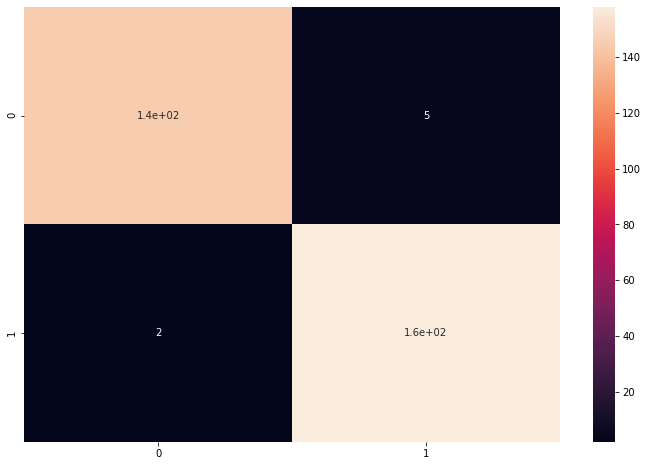

In [59]:
toggle_cell_code('co_14')

fig, ax=plt.subplots(1,1,figsize=(12,8))

#fig, ax=plt.subplots()
sns.heatmap(confusion_matrix(df_class, predict_class),label='Hola',annot=True)
#ax.legend()
print('Las clases son: 0) cero, Espondilolistesis; 1) uno, Hernia')

In [60]:
toggle_cell_code('co_15')
df4=df4.rename(columns={"label":"Cluster", "pelvic_incidence":"incidencia pélvica", "pelvic_tilt":"inclinación pélvica", "lumbar_lordosis_angle":"ángulo de lordosis lumbar", "sacral_slope":"pendiente sacra", "pelvic_radius":"radio pélvico" })

Codigo

## Resultado

In [61]:
toggle_cell_code('co_16')
df4["Cluster"]=df4["Cluster"].replace(0,"Spondylolisthesis")
df4["Cluster"]=df4["Cluster"].replace(1,"Hernia")
df4.groupby('Cluster').mean().sort_values(by=["radio pélvico"], ascending=False)

Codigo

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico
Cluster,,,,,
Hernia,50.677028,14.754555,40.931361,35.922473,121.065144
Spondylolisthesis,71.385080,20.634574,64.127730,50.750507,114.433909
